In [20]:
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline
import cv2
import random
import os

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model

In [22]:
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.16.1


In [23]:
import pathlib
import zipfile
import numpy as np
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from keras.preprocessing import image
from keras.preprocessing.image import *
from fastai.metrics import error_rate, accuracy
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import class_weight

In [24]:
train_path = '/kaggle/input/fer2013/train'
test_path = '/kaggle/input/fer2013/test'

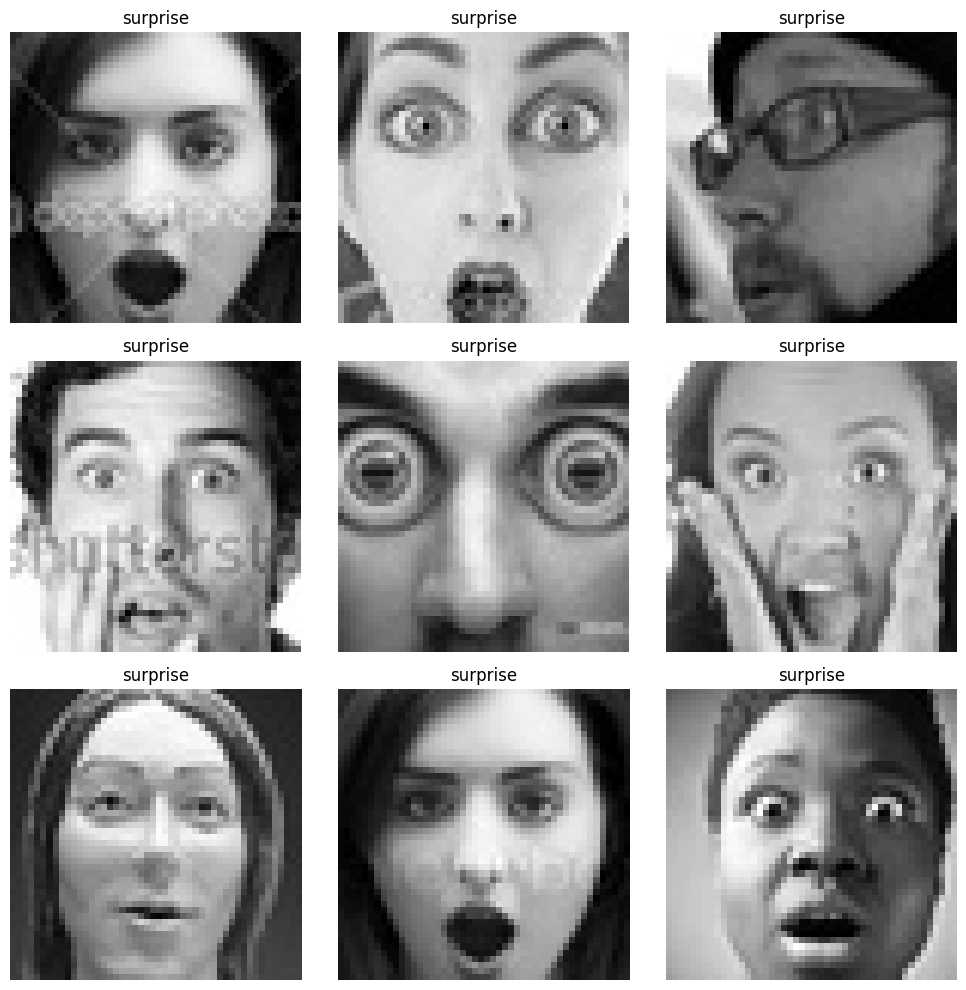

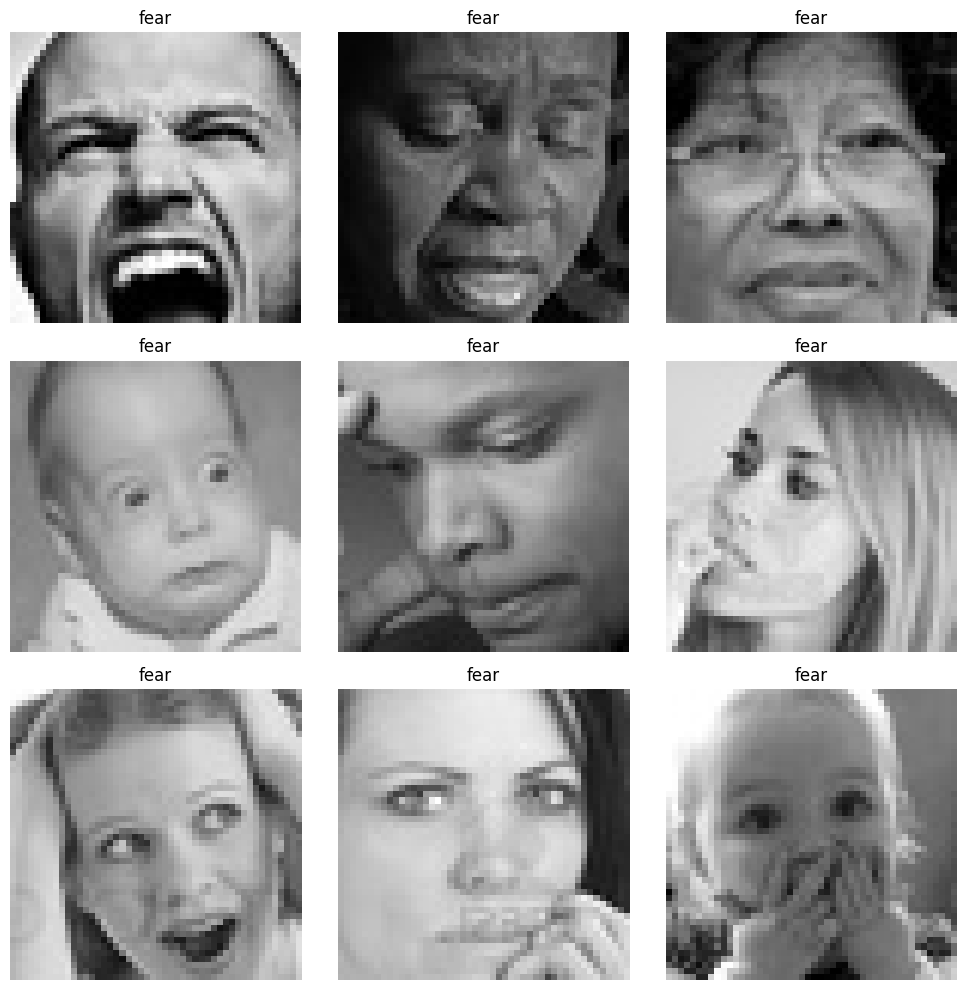

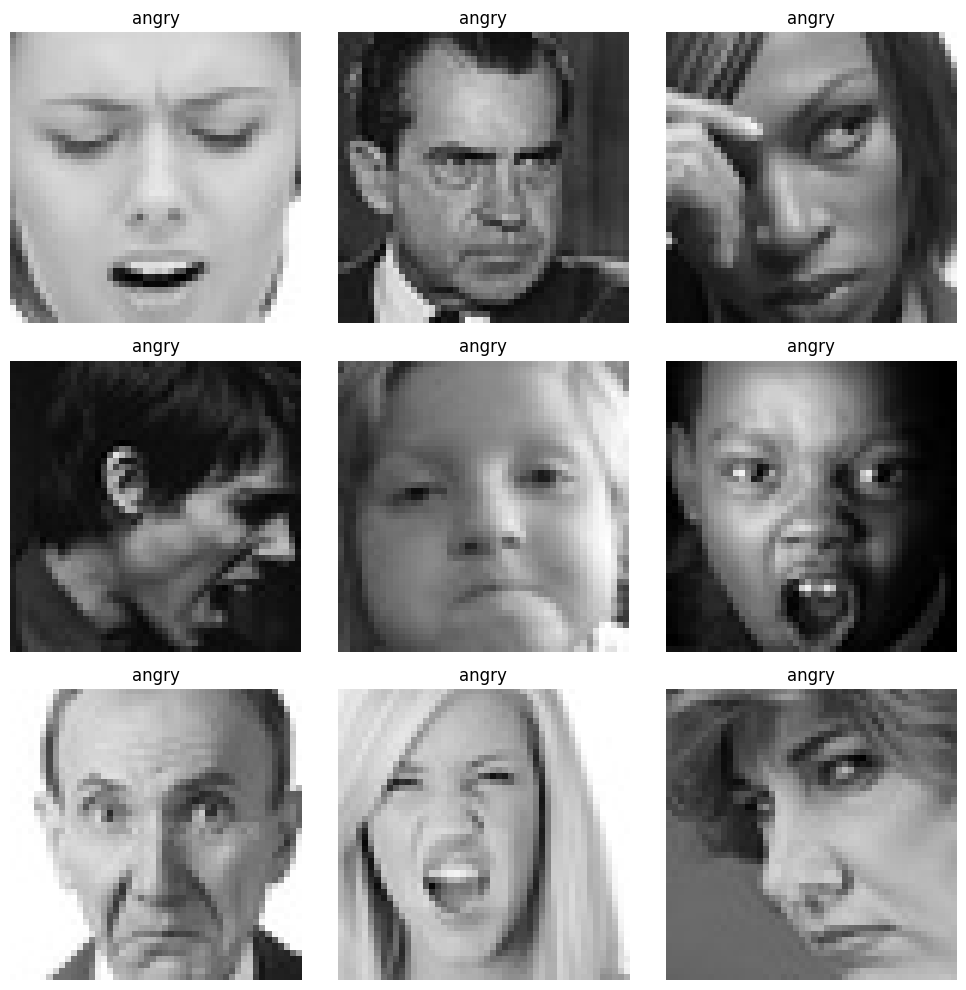

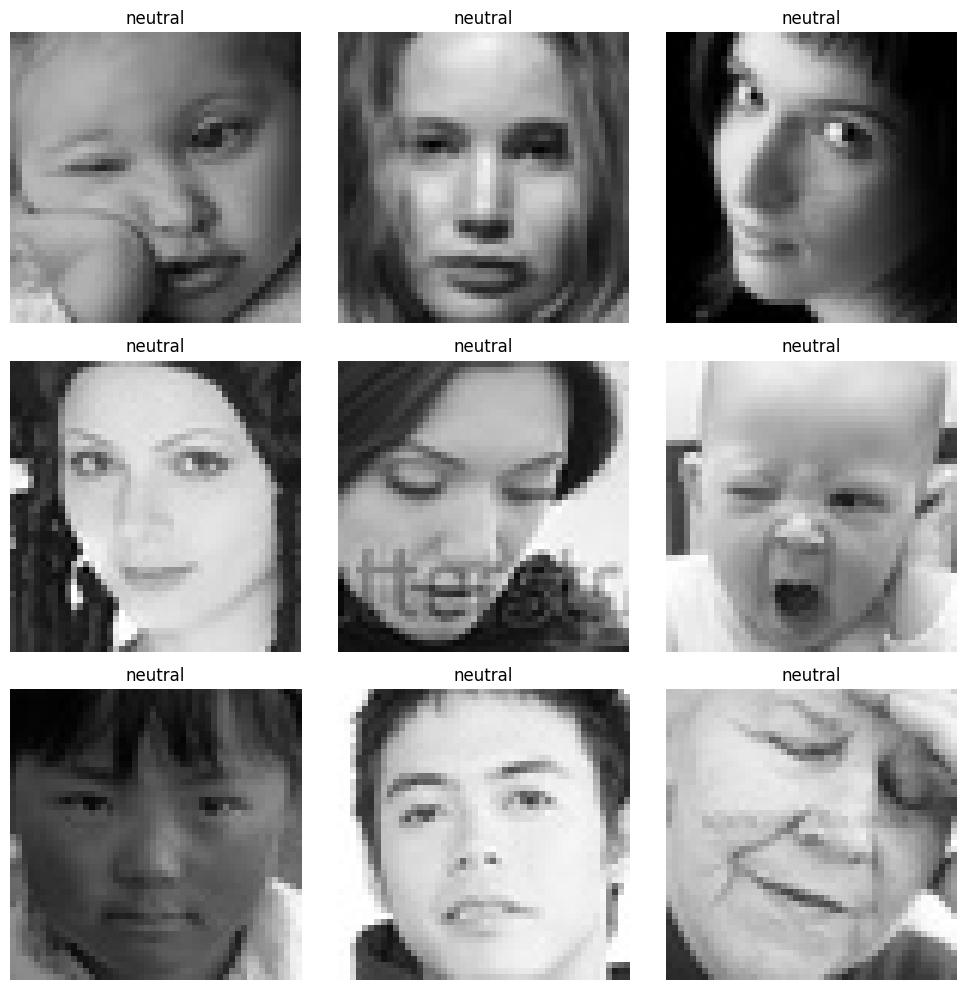

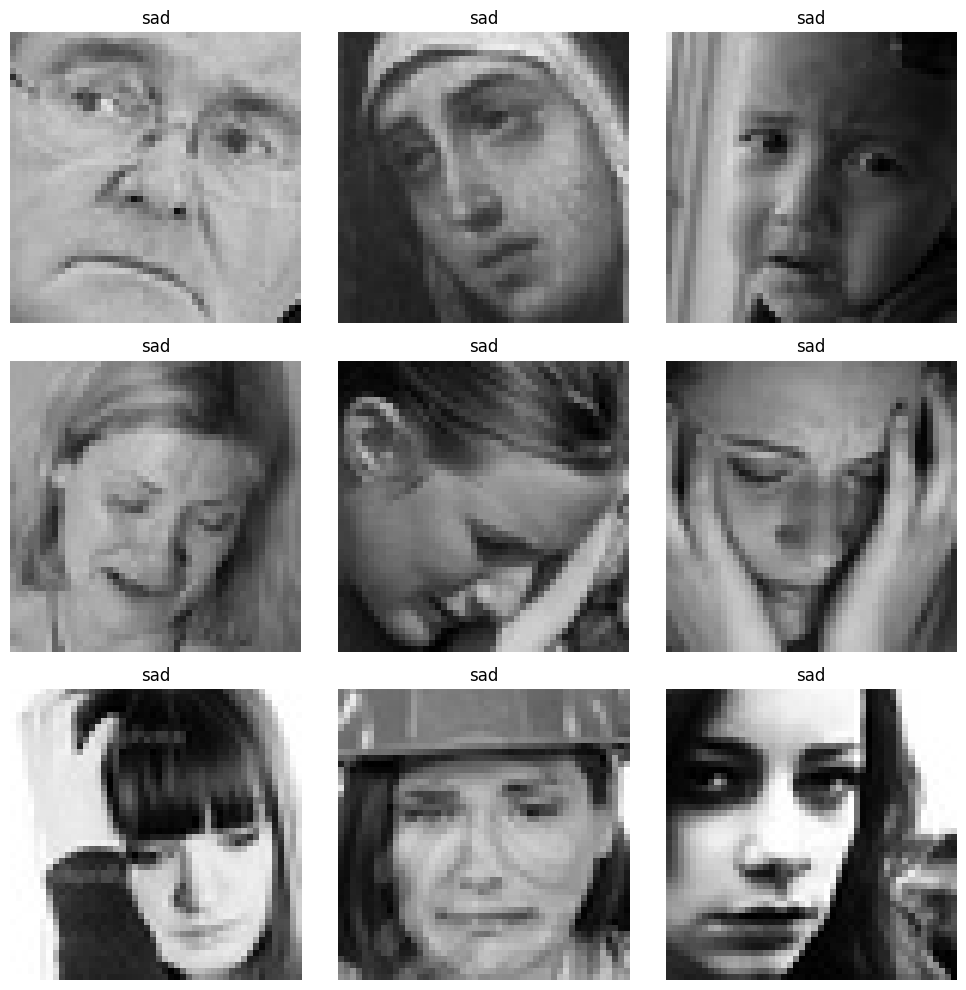

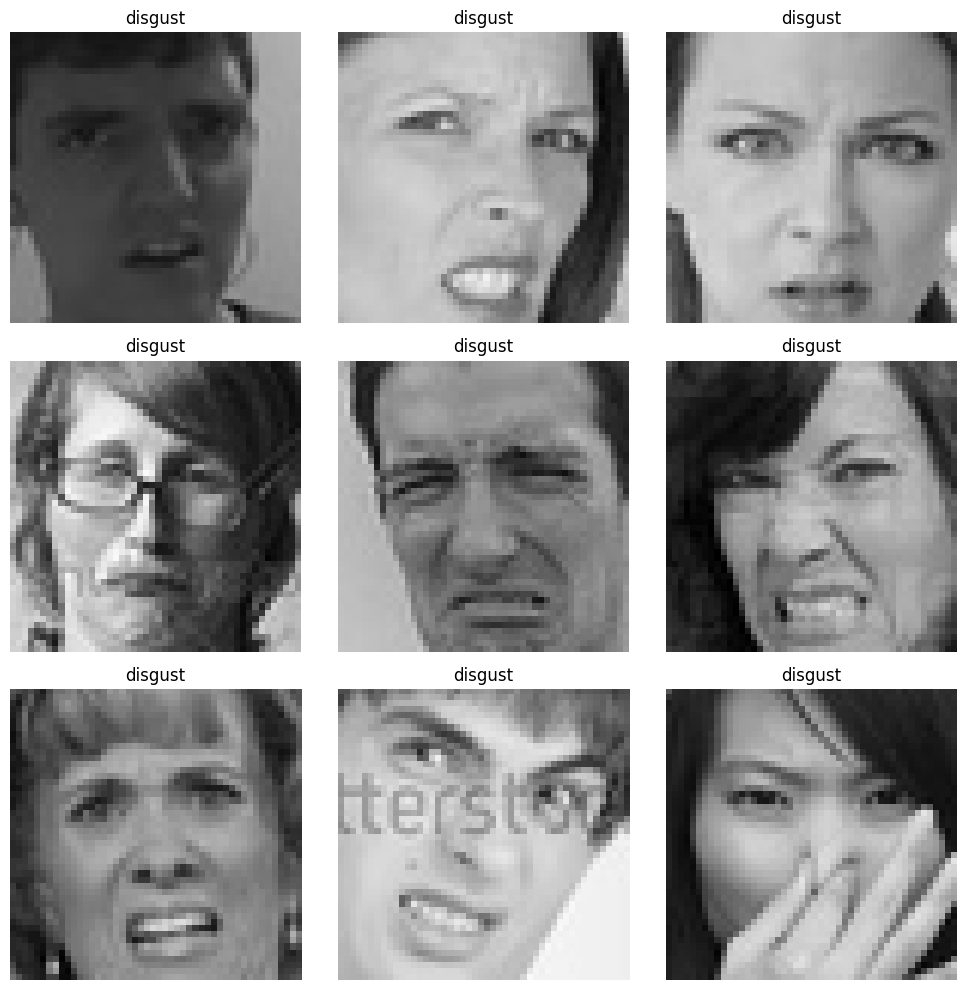

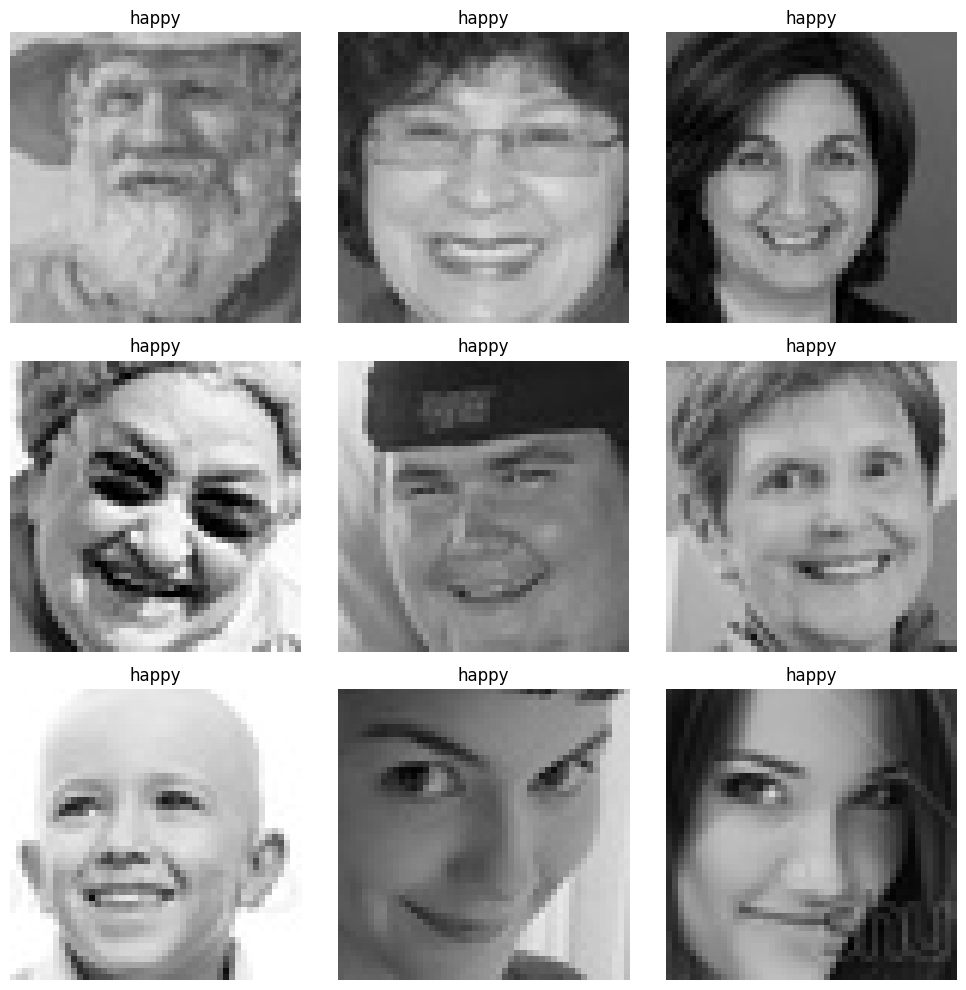

In [25]:
# Function to display images for each emotion
def display_images(emotion):
    plt.figure(figsize=(10, 10))
    folder_path = os.path.join(train_path, emotion)
    
    # Loop to display 9 images
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        
        # Load image
        img_path = os.path.join(folder_path, os.listdir(folder_path)[i])
        img = image.load_img(img_path, target_size=(48, 48)) 
        plt.title(emotion)
        plt.imshow(img) 
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

for emotion in os.listdir(train_path):
    display_images(emotion)


In [26]:
def mylistdir(directory):
    filelist = os.listdir(directory)
    return [x for x in filelist
            if not (x.startswith('.'))]

labels = os.listdir(train_path)
print("Our 7 Emotion Labels:")
labels

Our 7 Emotion Labels:


['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

**VISUALIZING OUT DATA**

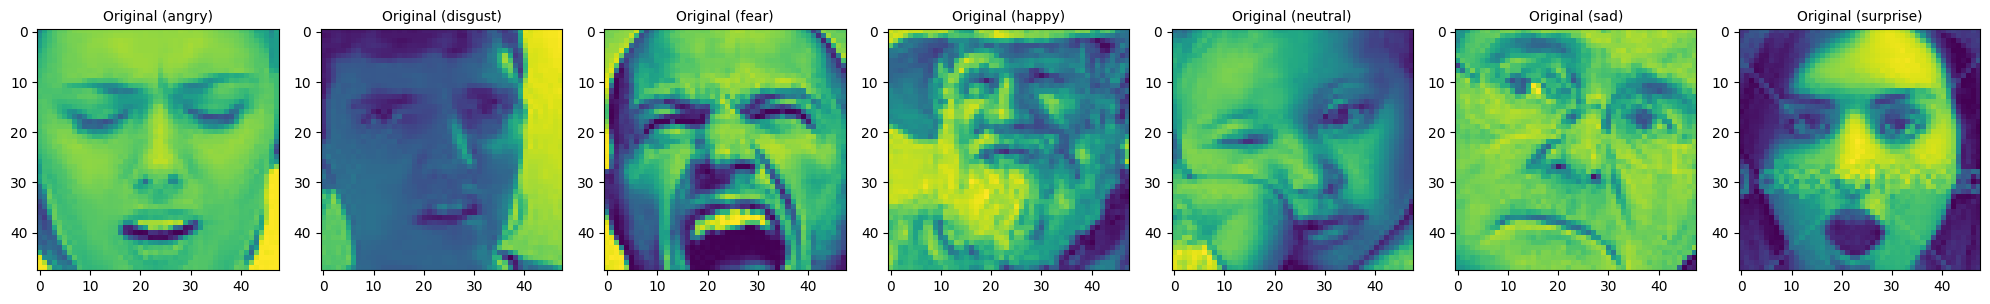

In [27]:
import os
import matplotlib.pyplot as plt

# Define the base training path and emotion labels
train_path = "/kaggle/input/fer2013/train/"  # Update this to your actual training path
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # Emotion labels

# Define a function to list files in a directory (excluding hidden files)
def mylistdir(directory):
    if os.path.exists(directory):
        filelist = os.listdir(directory)
        return [x for x in filelist if not x.startswith('.')]
    else:
        print(f"Directory not found: {directory}")
        return []

# Create subplots to display one example image for each label
fig, axes = plt.subplots(1, len(labels), figsize=(20, 20))

for i, label in enumerate(labels):
    directory = os.path.join(train_path, label)  # Path to the label's folder
    filelist = mylistdir(directory)  # Get the list of files in the folder

    if filelist:  # Check if the folder contains any files
        ex_image = os.path.join(directory, filelist[0])  # Take the first image
        axes[i].imshow(plt.imread(ex_image))  # Display the image
        axes[i].set_title(f"Original ({label})", fontsize=10)  # Add title
    else:
        print(f"No images found in directory: {directory}")
        axes[i].axis('off')  # Hide the subplot if no images are available

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [28]:
# #Print Image Label Distributions
# for i in labels:
#     print(i, '\nTrain: ' + str(len(os.listdir(train_path + i +'/')))+ ' images' +'\nTest: ' + str(len(os.listdir(test_path+i+'/')))+' images\n')

/tmp/ipykernel_23/1388724862.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, fontsize=12, rotation=45)
/tmp/ipykernel_23/1388724862.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, fontsize=12, rotation=45)


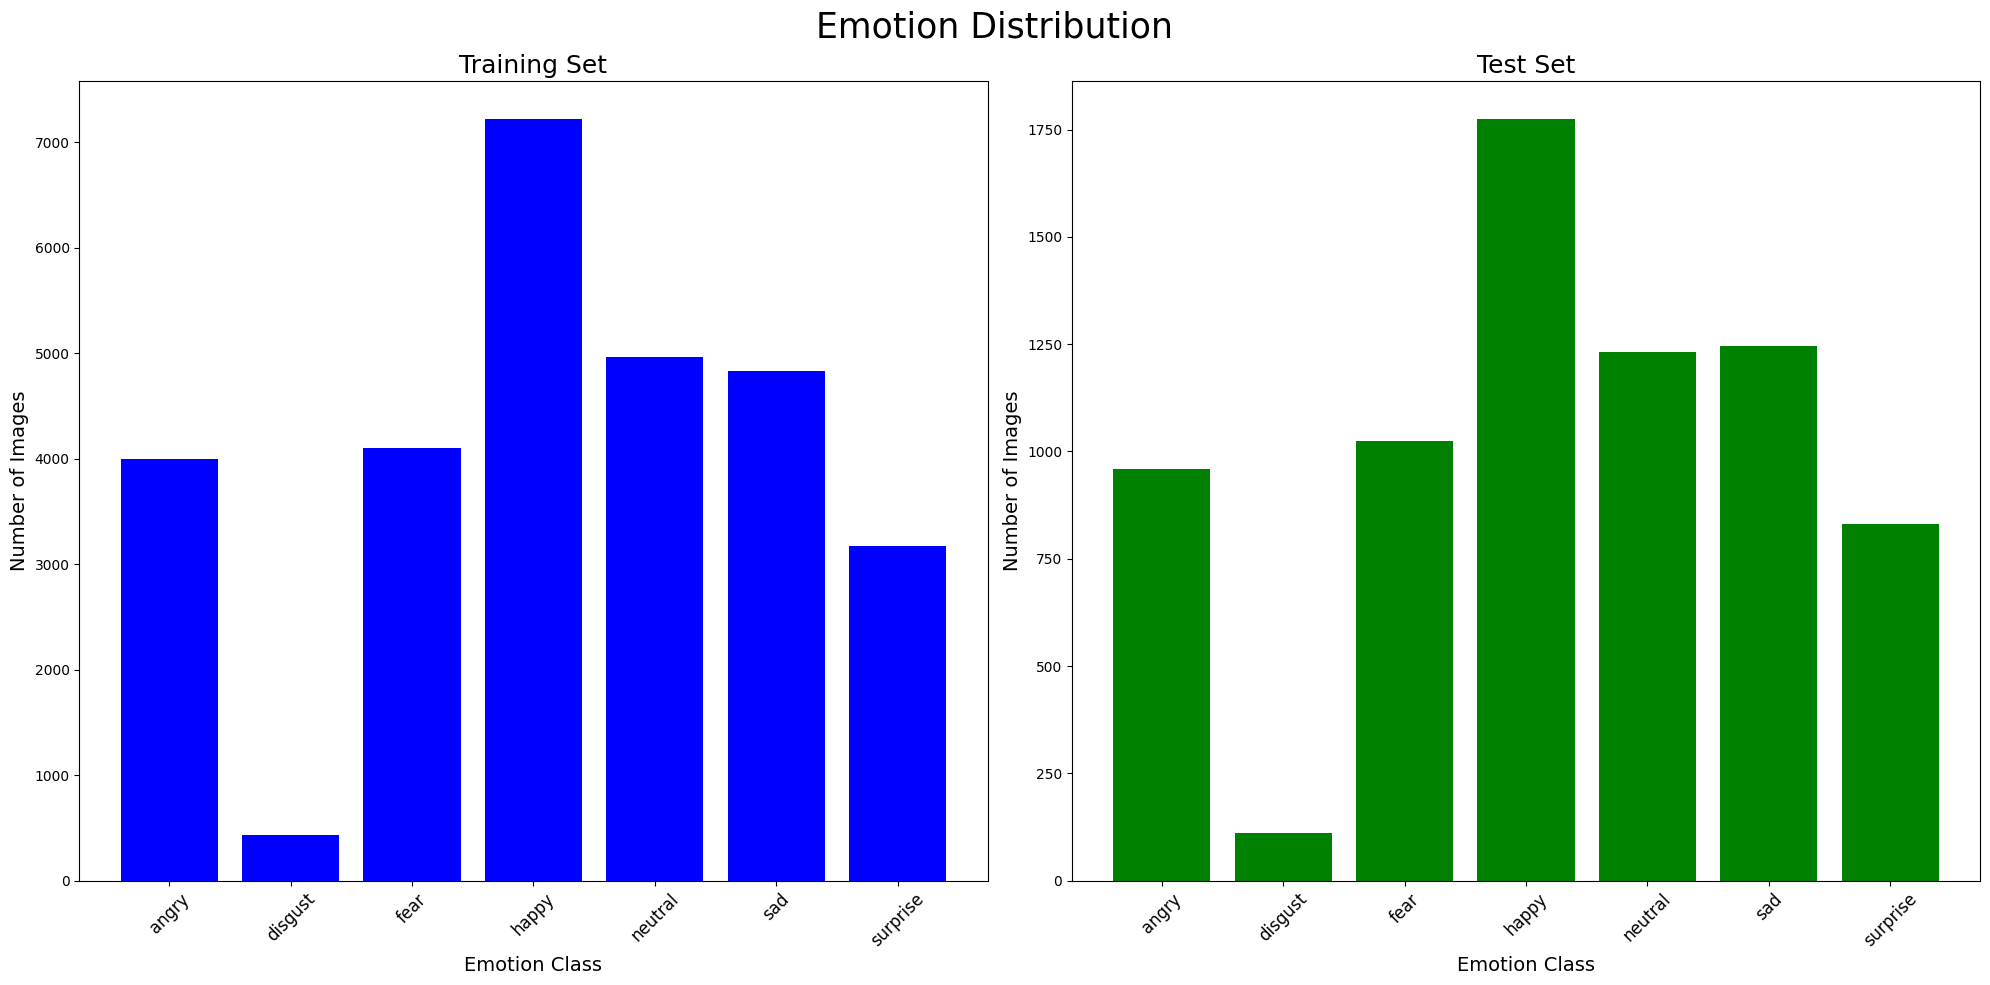

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths and labels
train_path = "/kaggle/input/fer2013/train/"  # Update with your training path
test_path = "/kaggle/input/fer2013/test/"  # Update with your test path
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # Emotion labels

# Function to count images in each class directory
def count_images_in_classes(base_path, labels):
    counts = []
    for label in labels:
        class_path = os.path.join(base_path, label)  # Path to the label's folder
        if os.path.exists(class_path):  # Check if the folder exists
            counts.append(len([file for file in os.listdir(class_path) if not file.startswith('.')]))
        else:
            print(f"Directory not found: {class_path}")
            counts.append(0)  # Append 0 if the folder doesn't exist
    return np.array(counts)

# Get image counts for training and test sets
train_dist = count_images_in_classes(train_path, labels)
test_dist = count_images_in_classes(test_path, labels)

# Plot the distributions
plt.figure(figsize=(20, 10))
plt.suptitle('Emotion Distribution', fontsize=25)

# Training set distribution
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Training Set', fontsize=18)
ax1.bar(labels, train_dist, color='blue')
ax1.set_xlabel('Emotion Class', fontsize=14)
ax1.set_ylabel('Number of Images', fontsize=14)
ax1.set_xticklabels(labels, fontsize=12, rotation=45)

# Test set distribution
ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Test Set', fontsize=18)
ax2.bar(labels, test_dist, color='green')
ax2.set_xlabel('Emotion Class', fontsize=14)
ax2.set_ylabel('Number of Images', fontsize=14)
ax2.set_xticklabels(labels, fontsize=12, rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


**DATA PREPROCESSING**

In [ ]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("/kaggle/input/fer2013/train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("/kaggle/input/fer2013/test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

In [ ]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x
    

In [ ]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/15
891/897 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3153 - loss: 1.7218
Epoch 1: saving model to modelWeight.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.3157 - loss: 1.7210 - val_accuracy: 0.4252 - val_loss: 1.5130 - learning_rate: 0.0010
Epoch 2/15
  1/897 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3750 - loss: 1.5405
Epoch 2: saving model to modelWeight.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.3750 - loss: 1.5405 - val_accuracy: 0.2000 - val_loss: 1.6468 - learning_rate: 0.0010
Epoch 3/15
891/897 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4468 - loss: 1.4642
Epoch 3: saving model to modelWeight.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.4468 - loss: 1.4640 - val_accuracy: 0.4431 - val_loss: 1.4366 - learning_rate: 0.0010
Epoch 4/15
  1/897 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3750 - loss: 1.5

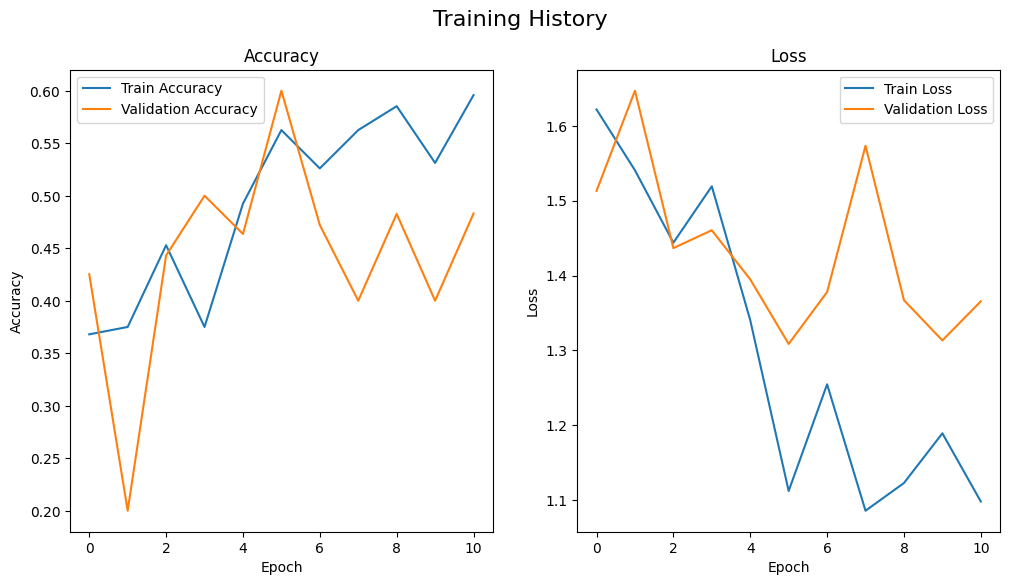

In [37]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the model
input_layer = Input(shape=(48, 48, 1))  # Correct input shape for grayscale images

x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(7, activation='softmax')(x)  # Adjusted to 7 classes

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with a fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/fer2013/train/',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/kaggle/input/fer2013/test/',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

# Calculate steps per epoch and validation steps based on dataset size
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Define callbacks
checkpoint = ModelCheckpoint(
    "modelWeight.weights.h5",
    monitor='val_accuracy',
    save_weights_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    min_lr=0.00001
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

callbacks = [checkpoint, reduce_lr, early_stopping]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Plot training history
plt.figure(figsize=(12, 6))
plt.suptitle('Training History', fontsize=16)

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [38]:
model.evaluate(validation_generator, verbose=2)

225/225 - 7s - 30ms/step - accuracy: 0.4625 - loss: 1.3963


[1.396308422088623, 0.4625243842601776]

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot loss on the first subplot
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')

# Plot accuracy on the second subplot
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')

# Adjust the layout to make sure everything fits well
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

# Show the plot
plt.show()


In [39]:
model_json = model.to_json()
with open("model_a2.json","w") as json_file:
    json_file.write(model_json)